# important page for tunning functions ...
https://keras.io/keras_tuner/

# assignment - recreate this excercise

https://github.com/vtech20/keras_tuner_sample/blob/main/Keras_Tuner.ipynb

# GPU installation

- conda env list
- conda activate tensorflow  # assuming it exists
- python   #activate python
    - import tensorflow    # import the library
    - tensorflow.test.is_gpu_available()     # shows true or not if the gpu is available shows device name/number such as "3060 laptop GPu"
    - tensorflow.test.is_built_whit_cuda()   # shows yes or not
    - tensorflow.config.list_physical_decives # shows the cpu and gpu available in the laptop
    - exit  # the python environment
    
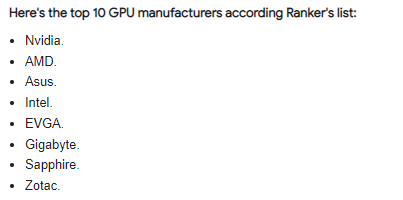
    

#  Steps to follow to use GPU in your system

pypi.org/project/tensorflow-gpu


* infro from google colab

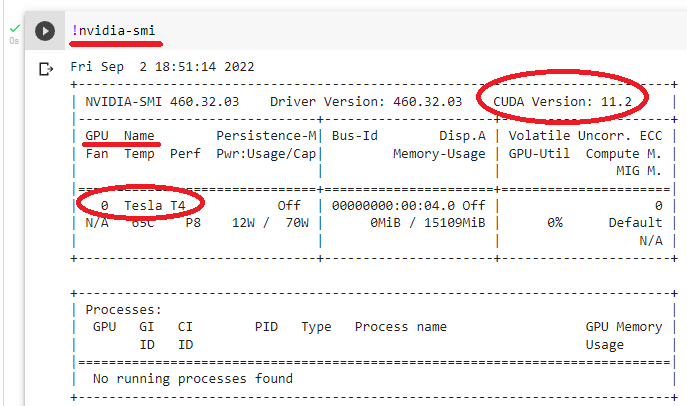

* from my local terminal, info about the gpu in my local desktop

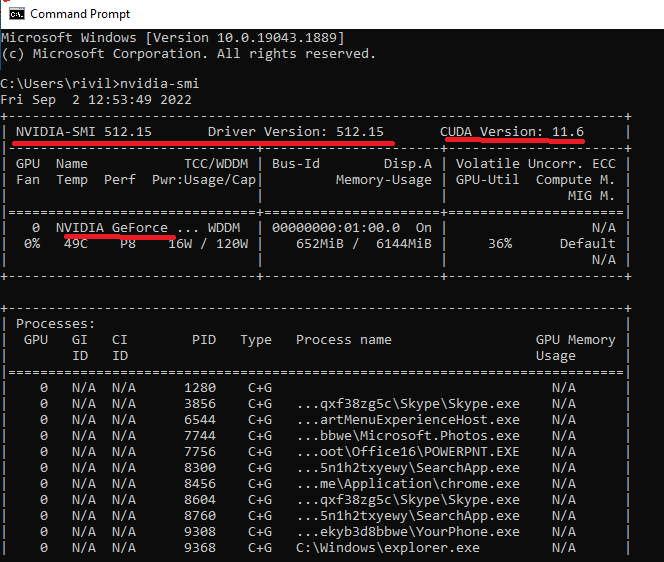

* from WINDOWS command

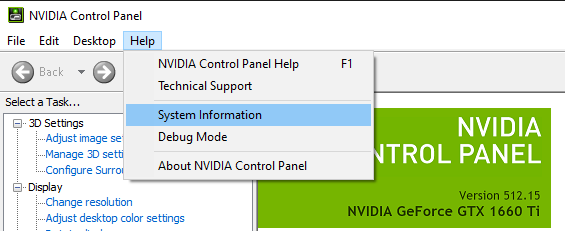

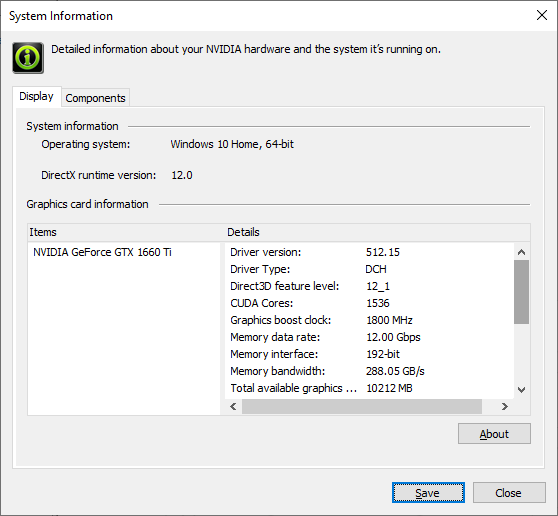



* once you have general information about the GPU, you need to find your gpu driver in the nvidia website

https://www.nvidia.com/Download/index.aspx?lang=en-us

* with my local desktop info
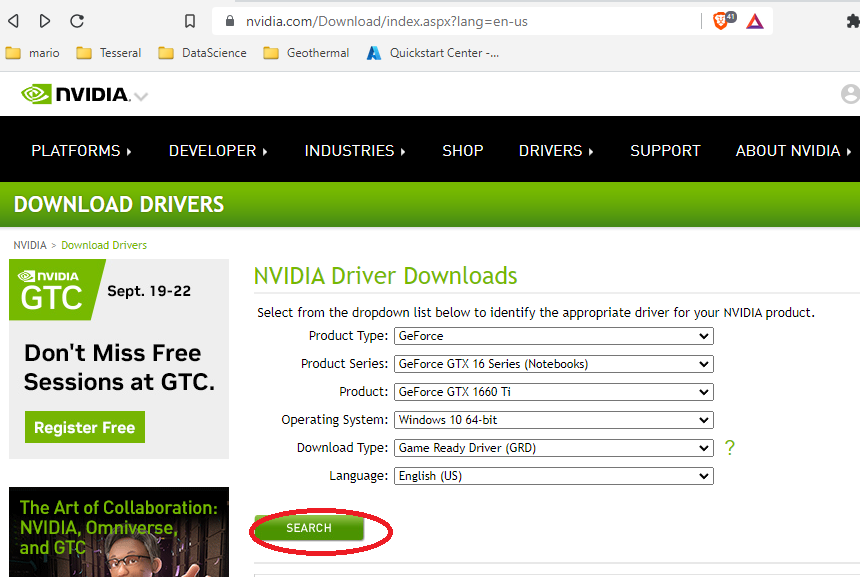

* download the driver to your pc and install it

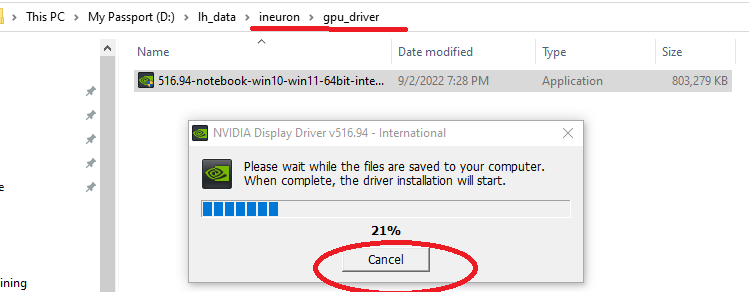

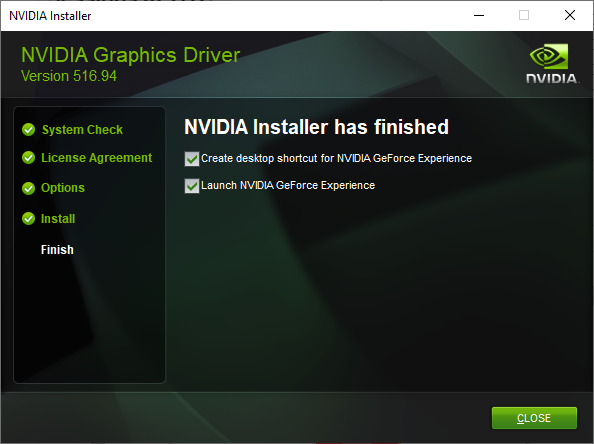


* then isntall CUDA and cuDNN with conda in your tensorflow environment

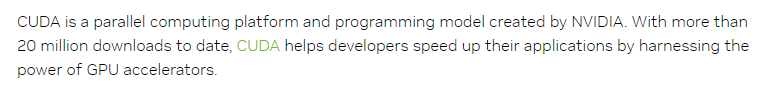

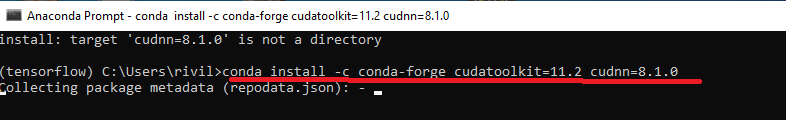

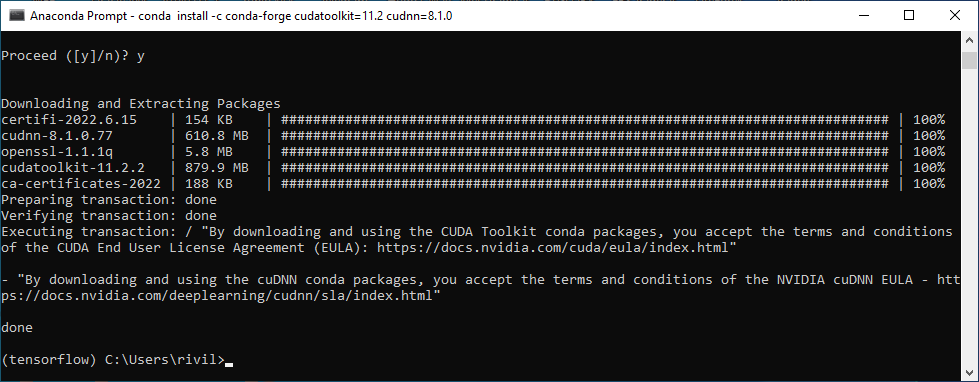

* go into the tensorflow environment window and check the exitence of CUDA

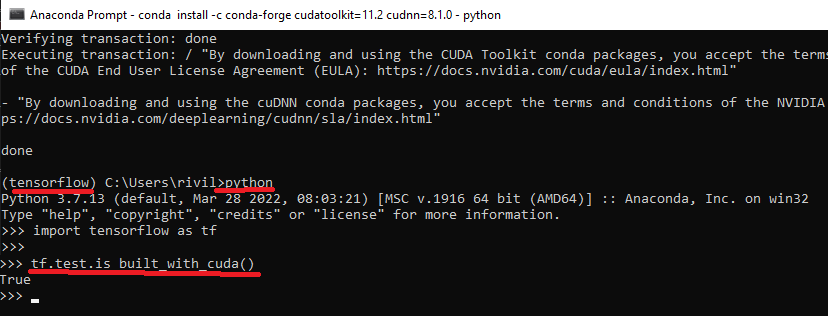

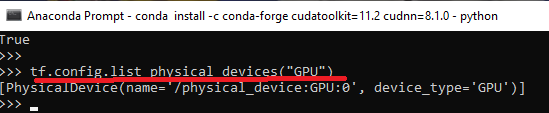

In [1]:
import tensorflow as tf
from tensorflow import keras

In [4]:
!pip install keras==2.6   # Install and import Keras

     ---------------------------------------- 1.3/1.3 MB 7.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0


In [5]:
!pip install -q -U keras-tuner   # Install and import the Keras Tuner.

In [6]:
import keras_tuner as kt

In [7]:
# dowload data

(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

In [8]:
label_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
# !pip install -U matplotlib   installing matplotlib on this environment

     ---------------------------------------- 7.2/7.2 MB 24.2 MB/s eta 0:00:00
     ------------------------------------- 957.2/957.2 kB 30.5 MB/s eta 0:00:00
     ---------------------------------------- 54.9/54.9 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 51.8 MB/s eta 0:00:00


In [12]:
set(label_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

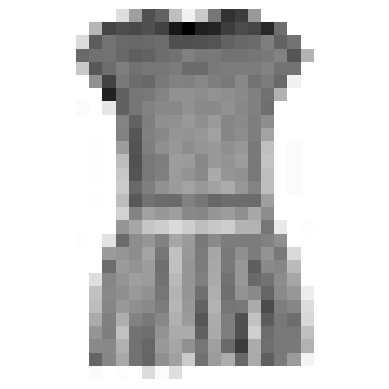

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.imshow(img_train[3], cmap='binary')
plt.axis('off')
plt.show()

In [13]:
# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

In [14]:
img_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
img_train.shape

(60000, 28, 28)

In [16]:
# define the model

def model_builder(hp):
  model = keras.Sequential()
  
  #input layers
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)  # .Int used for ranges of values
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))                                 #output layer, 10 classes

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])  # .choise used for a few indicated values

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [17]:
# initiate the tuner for hypertuning

tuner = kt.Hyperband(model_builder,      # hypermodel function specified above
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [18]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [19]:
tuner.search(img_train, label_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 01m 26s]
val_accuracy: 0.875249981880188

Best val_accuracy So Far: 0.8832499980926514
Total elapsed time: 00h 17m 13s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 224 and the optimal learning rate for the optimizer
is 0.001.



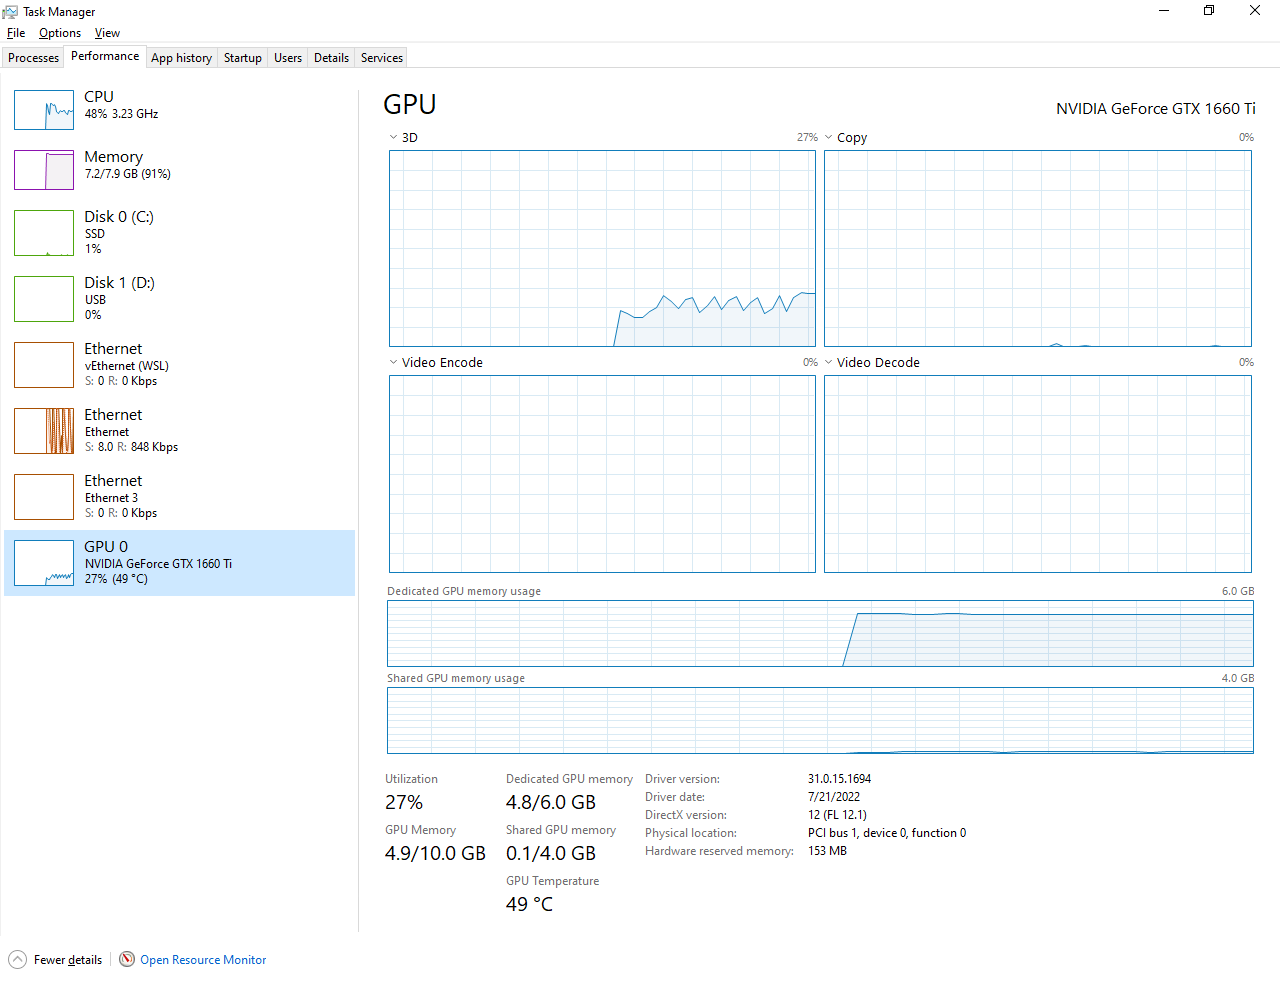